# 1-1 Introduction

Natural language processing (NLP) is an important research branch in the field of computer science and artificial intelligence. It aims to allow machines to understand and process human language. Typical tasks such as sentiment analysis, machine translation, intelligent question answering, dialogue systems, text generation, information extraction, etc. . Whether in Chinese or English, words are composed of characters, which are then organized into phrases and sentences, and even paragraphs and chapters. Unlike computer vision or speech recognition, the input of the NLP model is discrete (usually a sequence of words or a sequence of words). For example, in sentiment analysis, the model input is the word sequence "today/mood/very good", and the model finally judges that this comment is positive based on the emotional polarity of "very good" and the "semantic understanding" of the entire sequence Evaluation. The first step for the model to understand that this sentence is a positive emotion is to convert the word sequence into a digital encoding that the computer can recognize. One-hot encoding (one-hot) is the simplest way to encode text. First, we can create a vocabulary of |𝑉| based on a large amount of text data, and then use a different id for each word. For the word 𝑤𝑖 whose corresponding id is ii, it can be represented as a vector of length |𝑉| by one-hot encoding, where the value of the iith dimension is 1, and the values ​​of other dimensions are all 0. For words not in the vocabulary, they are uniformly expressed as OOV (out-of-vocabulary). For example, when the vocabulary is ["restaurant", "service", "thoughtful",...], the one-hot encoding of each word can be expressed as:

1.	restaurant: [1, 0, 0, ...]
2.	service: [0, 1, 0, ...]
3.	thoughtful: [0, 0, 1, ...]

Although one-hot encoding is simple and effective, the encoding is very sparse (the vector dimension of each word is equal to the size of the vocabulary, and the value is 1 in only one dimension). Moreover, the representations of different words are obviously independent of each other, so the relative distance between words cannot be characterized, that is, the semantic information of the word level cannot be encoded. For example, both "thoughtful" and "intimate" can be used to evaluate the quality of the service, and have similar semantics, but from the one-hot encoding of the two, it cannot be seen that the distance between the two words is closer. In the one-hot encoding, "thoughtful" The distance between "and "bad" is the same as the distance between "thoughtful" and "caring".
The emergence of Distributed Representation makes up for the shortcomings of one-hot encoding. The same is to represent words as vectors. Distributed representation has values ​​in each dimension of the word vector, which makes more efficient use of space, and can calculate the degree of similarity between two vectors through the "distance measurement formula", such as cosine Distance, European distance. Word2vec[1], proposed by Google in 2013, uses adjacent words to predict feature words (CBOW) or uses feature words to predict adjacent words (Skip-Gram) to perform unsupervised learning by transforming the language model to represent sparse one-hot Embed in low-dimensional space. The obtained word embedding can represent the semantic information of the word to a certain extent, and supports some "linear semantic calculations", such as "king + man-woman = queen".
 
As in the above example, the distributed representation can embed the one-hot encoding of length $|V|$ into a lower-dimensional space, and the corresponding word vectors of words with similar semantics are also more similar.
 
The traditional word vector model represented by word2vec is mainly to learn lexical level representation, which is context-free. And we know that the semantics of a word may change in different contexts, for example, the meaning of "apple" in the two sentences "I/love/eat/apple" and "apple/mobile phone/discount/了" Is different.
In order to obtain the word vector representation related to the context, ELMo[2] uses stacked bi-lstm (two unidirectional multi-layer lstm splicing) to train the language model, and synthesizes the lstm output of different layers to obtain the final word embedding. The word embedding obtained in this way considers the context from two directions (from left to right and from right to left), and combines the lstm output of different layers to consider the semantic representation of different granularities, which has stronger representation ability than word2vec .
However, since ELMo has only three layers, the expressive power is still relatively limited, and the usage method is still similar to word2vec, that is, the contextual word embedding output by ELMo is input into the downstream model as a feature (this method is called feature-based) For different downstream tasks, it is still necessary to design a corresponding model (task specific architecture) according to the task to achieve a specific task.

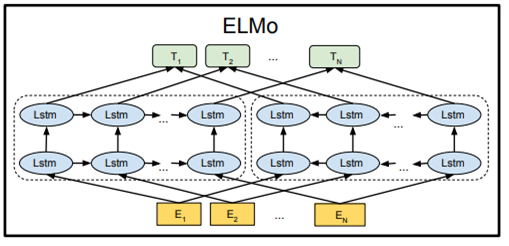

Subsequently, the emergence of Open AI GPT[3] and BERT[4] overturned the use of feature-based, and proposed a pretrain-then-finetune two-stage model training paradigm (Pretrain-then-finetune), which no longer needs to target downstream Task design specific models can easily obtain SOTA results on various typical NLP tasks.

In the pre-training stage, after the model parameters are randomly initialized, the unsupervised training represented by the language model is performed on a large amount of corpus to obtain a general pre-training model (with deeper and stronger context-sensitive semantics; and the subsequent fine-tuning refers to Change the output form of the pre-training model according to the task paradigm (such as classification, sequence labeling, etc.), and train on the task data. In this way, the pre-training model can obtain a deeper and stronger semantic representation combined with context. For different downstream tasks You only need to add a small number of task-related parameters and fine-tune to achieve high accuracy on different tasks. This new method changes the research mode of customizing the model structure in the NLP field according to different tasks, and also allows only a small amount of labeled data to be used. It is possible to achieve high accuracy. The success of the two-step training framework of Pretrain and Fine-tune benefits from larger models, larger-scale data and continuously powerful computing resources.

Take BERT as an example, using BooksCorpus (800M words) and English Wikipedia (2,500M words) data for pre-training. The maximum length of a single piece of data is 512, and one batch of 256 pieces of data is updated 1 million times, which is equivalent to training 40 epochs on a 3.3 billion vocabulary. Training a BERT-BASE (12-layer Transformer) requires 4 days of training on 16 TPUs, and training a BERT-LARGE (24-layer Transformer) requires 4 days of training on 64 TPUs.

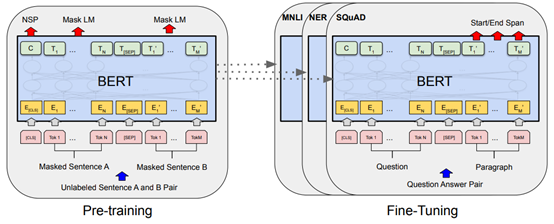

Both GPT and BERT use a multi-layer Transformer encoder [5] as the backbone structure. The difference is that BERT increases the model size to 24 layers and uses about 4 times more corpus than GPT for pre-training. Importantly, BERT also proposed a new pre-training task MLM (Masked Language Model), which can encode context information at the same time during training, which is superior to the traditional one-way language model, so that the pre-trained BERT can understand 11 natural languages. The task (the GLUE standard evaluation set consisting of 8 natural language understanding tasks [6] and the question-and-answer tasks SQuAD v1.1, SQuAD v2.0[7] and SWAG[8]) stood out, surpassed SOTA, and opened up the large-scale NLP A new era of language training models.

$author:$ Nelson LIN

$email:$ nelsonlin0321@outlook.com